In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import seaborn as sns

In [3]:
raplyrics = pd.read_csv('rap_lyrics.csv', header = None)
rap = pd.read_csv('rap_master.csv')

raplyrics = raplyrics.transpose()
raplyrics = raplyrics.rename(columns={raplyrics.columns[0]: "Lyrics"})

rap['Lyrics'] = raplyrics['Lyrics']

rap = rap[-rap['Lyrics'].isin(['Not Found', 'Error'])]

print(rap.shape)

(6627, 15)


In [4]:
countrylyrics = pd.read_csv('country_lyrics.csv', header = None)
country = pd.read_csv('country_master.csv')

countrylyrics = countrylyrics.transpose()
countrylyrics = countrylyrics.rename(columns={countrylyrics.columns[0]: "Lyrics"})

country['Lyrics'] = countrylyrics['Lyrics']

country = country[-country['Lyrics'].isin(['Not Found', 'Error'])]

print(country.shape)

(6088, 15)


In [5]:
metallyrics = pd.read_csv('metal_lyrics.csv', header = None)
metal = pd.read_csv('metal_master.csv')

metallyrics = metallyrics.transpose()
metallyrics = metallyrics.rename(columns={metallyrics.columns[0]: "Lyrics"})

metal['Lyrics'] = metallyrics['Lyrics']

metal = metal[-metal['Lyrics'].isin(['Not Found', 'Error'])]

print(metal.shape)

(6518, 15)


In [6]:
# Set data
stats = pd.DataFrame({
'genre': ['rap', 'country', 'metal'],
'acousticness': [rap['acousticness'].mean(), country['acousticness'].mean(), metal['acousticness'].mean()],
'danceability': [rap['danceability'].mean(), country['danceability'].mean(), metal['danceability'].mean()],
'energy': [rap['energy'].mean(), country['energy'].mean(), metal['energy'].mean()],
'instrumentalness': [rap['instrumentalness'].mean(), country['instrumentalness'].mean(), metal['instrumentalness'].mean()],
'valence': [rap['valence'].mean(), country['valence'].mean(), metal['valence'].mean()] 
})

stats

,acousticness,danceability,energy,genre,instrumentalness,valence
0,0.170129,0.704189,0.645335,rap,0.007871,0.454110
1,0.226974,0.574600,0.673032,country,0.007230,0.524166
2,0.028234,0.449873,0.866363,metal,0.093160,0.383489


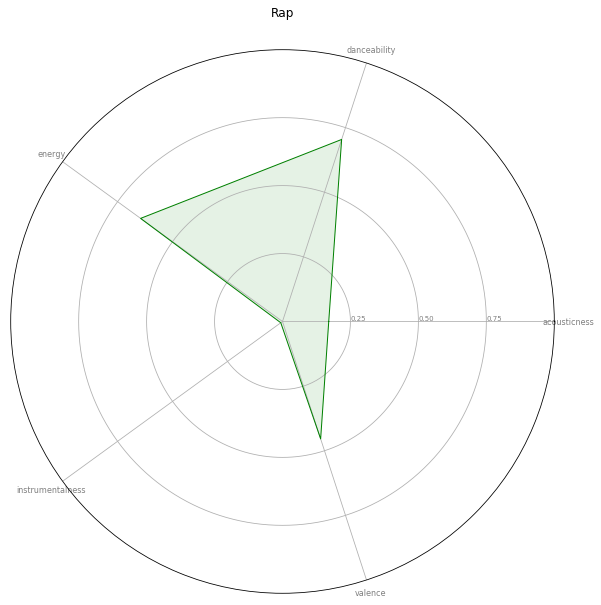

In [7]:
# number of variable
categories=list(stats)
categories.pop(3)
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=stats.loc[0].drop('genre').values.flatten().tolist()
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, polar = True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)
plt.title('Rap')
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'green')
 
# Fill area
ax.fill(angles, values, 'green', alpha=0.1)

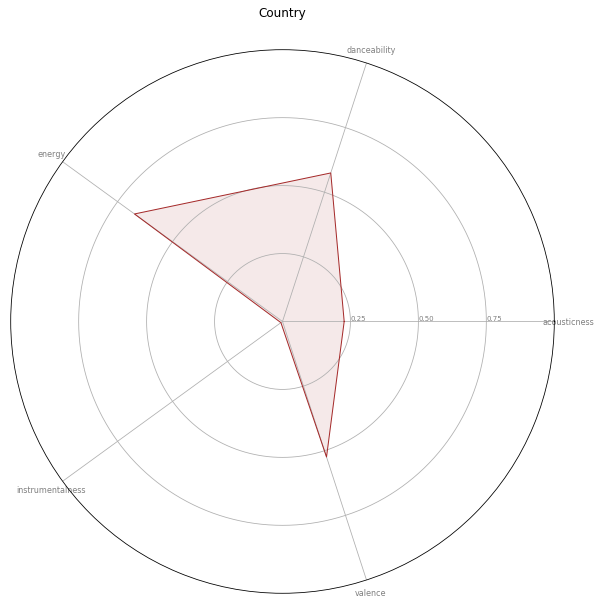

In [8]:
# We are going to plot the third line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=stats.loc[1].drop('genre').values.flatten().tolist()
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, polar = True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)
plt.title('Country')
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'brown')
 
# Fill area
ax.fill(angles, values, 'brown', alpha=0.1)

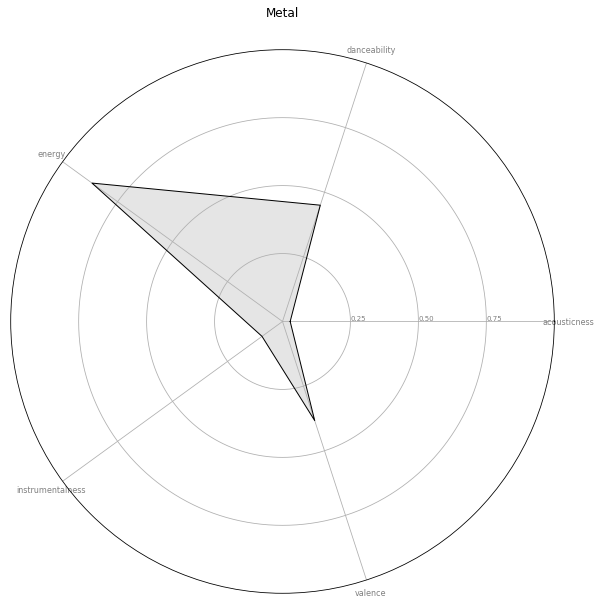

In [9]:
# We are going to plot the third line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=stats.loc[2].drop('genre').values.flatten().tolist()
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, polar = True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)
plt.title('Metal')
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'black')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)

In [83]:
metal.columns

Index(['Unnamed: 0', 'acousticness', 'artist', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'title', 'valence', 'Lyrics'],
      dtype='object')

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


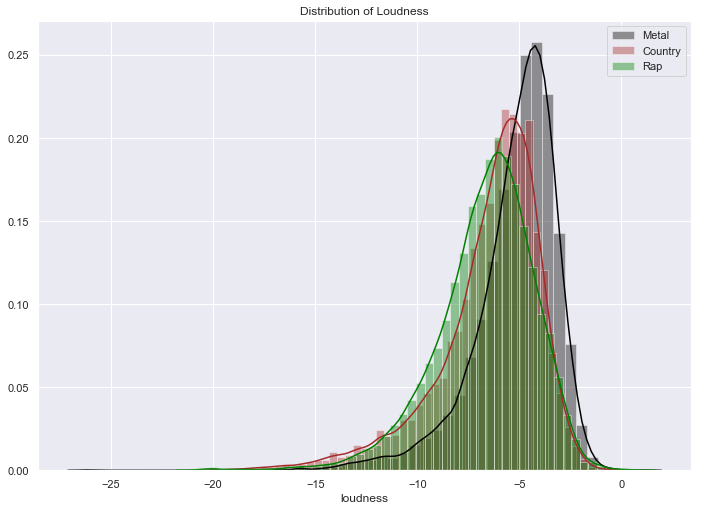

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(metal['loudness'], color = "black", label= "Metal")
sns.distplot(country['loudness'], color = "brown", label= "Country")
sns.distplot(rap["loudness"] , color="green", label="Rap")
plt.legend()
plt.title('Distribution of Loudness')
plt.show()

Text(0.5,1,'Metal')

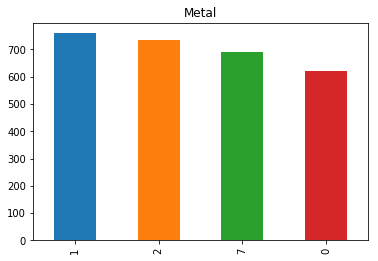

In [111]:
fig, ax = plt.subplots()
metal['key'].value_counts()[:4].plot(kind="bar")
plt.title('Metal')